In [11]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import *
from math import pi
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def apply_ctrl_z(qc:QuantumCircuit, q0:int, q1:int):
    qc.rz(pi/2,q1)
    qc.cx(q0,q1)
    qc.rz(-pi/2,q1)
    qc.cx(q0,q1)

    return

def apply_rx_pi_4(qc:QuantumCircuit, q0:int):
    qc.rz(pi/2,q0)
    qc.sx(q0)
    qc.rz(5*pi/4,q0)
    qc.sx(q0)
    qc.rz(pi/2,q0)

    return

def apply_rx_neg_pi_4(qc:QuantumCircuit, q0:int):
    qc.rz(pi/2,q0)
    qc.sx(q0)
    qc.rz(3*pi/4,q0)
    qc.sx(q0)
    qc.rz(pi/2,q0)

    return

def apply_ctrl_sx(qc:QuantumCircuit, q0:int, q1:int):
    apply_rx_pi_4(qc,q1)
    apply_ctrl_z(qc, q0, q1)
    apply_rx_neg_pi_4(qc,q1)
    apply_ctrl_z(qc, q0, q1)

def apply_ctrl_sx_dg(qc:QuantumCircuit, q0:int, q1:int):
    apply_ctrl_z(qc, q0, q1)
    apply_rx_neg_pi_4(qc,q1)
    apply_ctrl_z(qc, q0, q1)
    apply_rx_pi_4(qc,q1)

In [13]:
def debug_get_unitary(qc:QuantumCircuit):
    backend = Aer.get_backend("unitary_simulator")
    job = execute(qc, backend=backend)
    unitary = job.result().get_unitary()
    norm = np.linalg.norm(np.trace(unitary))

    return unitary, norm

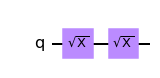

In [14]:
qc = QuantumCircuit(1)
qc.sx(0)
qc.sx(0)
# qc.sx(0)
# qc.sx(0)
qc.draw("mpl")

In [15]:
unitary, norm = debug_get_unitary(qc)

In [16]:
print(unitary)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
